In [1]:
import numpy as np
import matplotlib.pyplot as plt

aj =  [ 1.          2.71828183  7.3890561  20.08553692]
bj =  [1.46599761 2.22285026 8.80976965 0.        ]
cj =  [0.         0.75685264 5.83006675 0.        ]
dj =  [ 0.25228421  1.69107137 -1.94335558  0.        ]
100
100


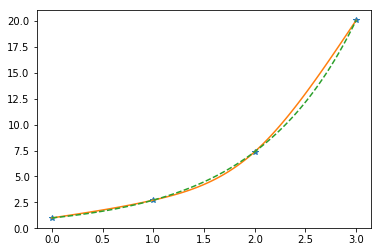

In [4]:
x_list = [0,1,2,3]
y_list = [1,np.e,np.e**2,np.e**3]
n = len(x_list)-1 #3/h[] n=3

x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)


for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]


#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
#step 3, solucion del sistema de ecuaciones lineales


l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in np.arange(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
    

print("aj = ",a)
print("bj = ",b)
print("cj = ",c)
print("dj = ",d)
    
x_array = np.linspace(min(x_list),max(x_list),100)
y_real = np.e**(x_array)

y_array = []



for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)

print(len(y_array))
print(len(x_array))
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_array,y_array,'-')
ax.plot(x_array,y_real,'--')